<a href="https://colab.research.google.com/github/granantuin/Model_vs_data_station/blob/master/Gaus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


In [0]:
drive_4km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_4km_h24toh48_dir/"
drive_1km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_Mars_H24to48_dir/"
dr=[drive_4km,drive_1km]
y_data=pd.read_excel(dr[0]+"y_coron_dir.xlsx",index_col=0)
x_data=pd.read_csv(dr[0]+"x_coron.csv",index_col=0)
x_data=x_data.iloc[:,0:9]
y_data=y_data[y_data>0]
result = x_data.join(y_data, how='outer').dropna()
x_data=result.iloc[:,0:9]
y_data=result["value"]

**Select model points to fit linear regression iloc in x_datal**

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, random_state=5)

In [0]:
y_pred=RandomForestRegressor().fit(x_train,y_train).predict(x_test)

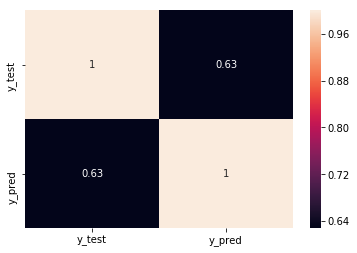

In [39]:
df2 = pd.DataFrame({'y_test': y_test,'y_pred':y_pred})
sns.heatmap(df2.corr(),annot=True)


<Figure size 720x576 with 0 Axes>

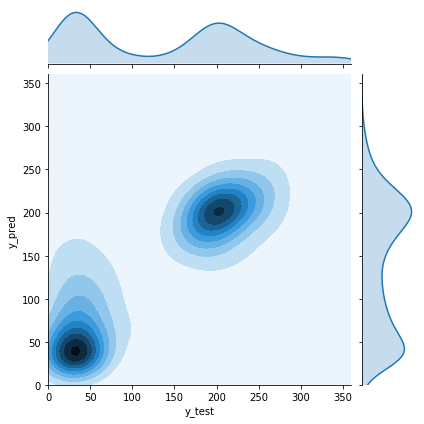

In [40]:
plt.figure(figsize=(10, 8))
sc=sns.jointplot(x="y_test",y="y_pred",kind="kde",data=df2,xlim=(0,360),ylim=(0,360),)

In [0]:
df2['DIF']=y_pred-y_test
df2["DIF"]=df2["DIF"][df2["DIF"]<180]
df2["DIF"]=df2["DIF"][df2["DIF"]>-180]
  

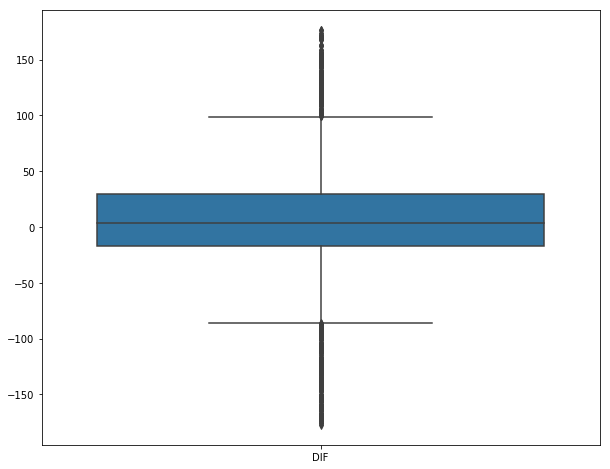

In [42]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=df2.iloc[:,2:3])
  

In [43]:
df2.iloc[:,2:3].describe()

,DIF
count,2463.000000
mean,3.601665
std,59.066826
min,-177.400000
25%,-16.700000
50%,3.200000
75%,29.650000
max,176.800000


**Filtering dat wind  only more 2 meters per second**

In [0]:
y_data=pd.read_excel(dr[0]+"y_coron_dir.xlsx",index_col=0)
x_data=pd.read_csv(dr[0]+"x_coron.csv",index_col=0)
x_data=x_data.iloc[:,0:9]
y_data=y_data[y_data>0]
result = x_data.join(y_data, how='outer').dropna()
x_data=result.iloc[:,0:9]
y_data=result["value"]
y_spd=pd.read_excel(dr[0]+"y_coron_spd.xlsx",index_col=0) 
y_spd=y_spd[y_spd>0]/3.6# units=Km/h to m/s
y_spd=y_spd[y_spd>2]#threshold 2m/s
y_spd=y_spd.rename(index=str, columns={"value": "spd"})
res1= x_data.join(y_spd, how='outer').dropna()
res2=res1.join(y_data, how='outer').dropna()
x_data=res2.iloc[:,0:9]
y_data=res2["value"]

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, random_state=5)

In [0]:
y_pred=RandomForestRegressor().fit(x_train,y_train).predict(x_test)

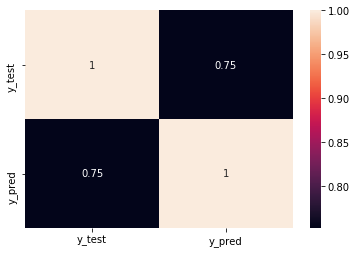

In [48]:
df2 = pd.DataFrame({'y_test': y_test,'y_pred':y_pred})
sns.heatmap(df2.corr(),annot=True)


<Figure size 720x576 with 0 Axes>

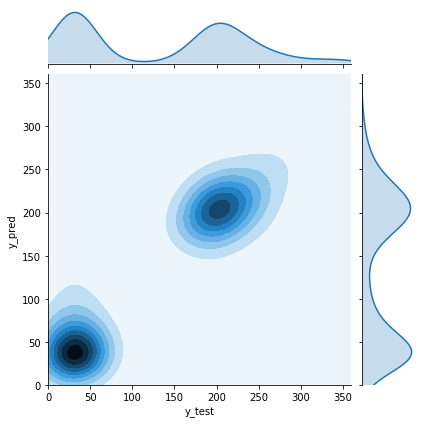

In [49]:
plt.figure(figsize=(10, 8))
sc=sns.jointplot(x="y_test",y="y_pred",kind="kde",data=df2,xlim=(0,360),ylim=(0,360),)

In [0]:
df2['DIF']=y_pred-y_test
df2["DIF"]=df2["DIF"][df2["DIF"]<180]
df2["DIF"]=df2["DIF"][df2["DIF"]>-180]
  

In [51]:
df2.iloc[:,2:3].describe()

,DIF
count,1862.000000
mean,2.960365
std,44.372680
min,-178.200000
25%,-10.400000
50%,2.800000
75%,17.800000
max,177.400000
